In [86]:
import sys
sys.path.append("../../")
import time
import pandas as pd 
import tensorflow as tf
import scrapbook as sb
import surprise


from reco_utils.common.timer import Timer
from reco_utils.recommender.ncf.ncf_singlenode import NCF
from reco_utils.recommender.ncf.dataset import Dataset as NCFDataset
from reco_utils.dataset.python_splitters import python_chrono_split
from reco_utils.dataset.python_splitters import python_random_split
from reco_utils.common.notebook_utils import is_jupyter
from reco_utils.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)
from reco_utils.dataset import movielens
from reco_utils.recommender.surprise.surprise_utils import predict, compute_ranking_predictions



# NCF model

In [20]:
movielens=movielens.load_pandas_df(size='100k',header=["userID", "itemID", "rating", "timestamp"])

100%|██████████| 4.81k/4.81k [01:38<00:00, 49.1KB/s]


In [22]:
train, test=python_chrono_split(movielens,0.75)

In [23]:
data = NCFDataset(train=train, test=test, seed=42)

In [77]:
for epoch in range(1,200,50): 
    model = NCF (
        n_users=data.n_users, 
        n_items=data.n_items,
        model_type="NeuMF",
        n_factors=4,
        layer_sizes=[16,8,4],
        n_epochs=1,
        batch_size=256,
        learning_rate=1e-3,
        verbose=10,
        seed=42
        )

    model.fit(data)

    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

    eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=10)
    sb.glue(f"precision {epoch}", eval_precision)

In [127]:
qqq[qqq['name'].str.contains('precision')][['name','data']].T

,0,1,2,3
name,precision 1,precision 51,precision 101,precision 151
data,0.15281,0.153234,0.149523,0.146766


# SVD Model

In [81]:
data = movielens.load_pandas_df(
    size='100k',
    header=["userID", "itemID", "rating"]
)

data.head()

100%|██████████| 4.81k/4.81k [00:28<00:00, 171KB/s] 


,userID,itemID,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [84]:
train, test = python_random_split(data, 0.75)

In [85]:
train_set = surprise.Dataset.load_from_df(train, reader=surprise.Reader('ml-100k')).build_full_trainset()
train_set

In [102]:
for epoch in range(1,92,15):
    
    # train
    
    svd = surprise.SVD(random_state=0, n_factors=200, n_epochs=epoch, verbose=True)
    svd.fit(train_set)
    
    # predict
    
    predictions = predict(svd, test, usercol='userID', itemcol='itemID')
    
    #evalutate
    
    eval_rmse = rmse(test, predictions)
    eval_mae = mae(test, predictions)
    eval_rsquared = rsquared(test, predictions)

    print(f'Evaluation for {epoch} epochs:')
    print("RMSE:\t\t%f" % eval_rmse,
          "MAE:\t\t%f" % eval_mae,
          "rsquared:\t%f" % eval_rsquared, sep='\n')
    
    # save results
    
    sb.glue(f'RMSE {epoch}', eval_rmse)
    sb.glue(f'MAE {epoch}', eval_mae)
    sb.glue(f'R2 {epoch}', eval_rsquared)

Processing epoch 0
Evaluation for 1 epochs:
RMSE:		1.016160
MAE:		0.819819
rsquared:	0.183317


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Evaluation for 16 epochs:
RMSE:		0.944249
MAE:		0.745117
rsquared:	0.294816


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Evaluation for 31 epochs:
RMSE:		0.949423
MAE:		0.747481
rsquared:	0.287066


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Evaluation for 46 epochs:
RMSE:		0.955697
MAE:		0.752355
rsquared:	0.277613


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [125]:
nb=sb.read_notebook('Modelisation - Etienne.ipynb')
qqq=nb.scrap_dataframe
qqq[qqq['name'].str.contains('RMSE')][['name','data']].T

,4,7,10,13,16,19,22
name,RMSE 1,RMSE 16,RMSE 31,RMSE 46,RMSE 61,RMSE 76,RMSE 91
data,1.01616,0.944249,0.949423,0.955697,0.956575,0.955371,0.953645


In [131]:
import matplotlib.pyplot as plt 
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


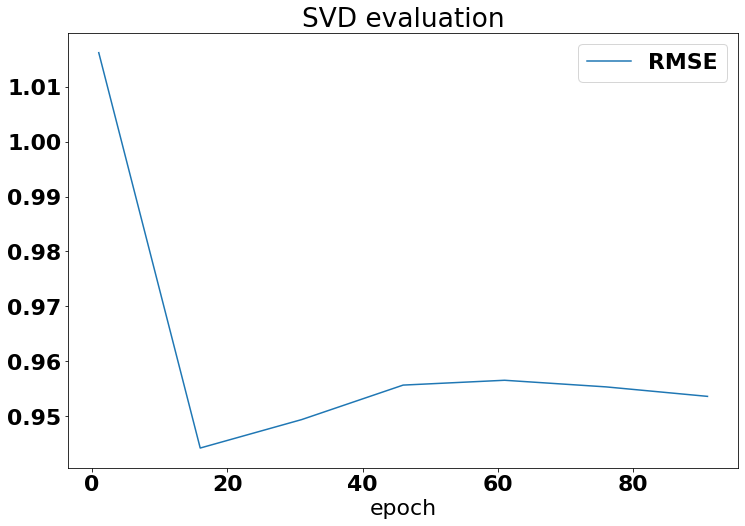

In [132]:
plt.figure(figsize=(12,8))
plt.plot(range(1,92,15),qqq[qqq['name'].str.contains('RMSE')].data)
#plt.plot(range(1,92,15),qqq[qqq['name'].str.contains('MAE')].data)
#plt.plot(range(1,92,15),qqq[qqq['name'].str.contains('R2')].data)
plt.title('SVD evaluation')
plt.xlabel('epoch')

plt.legend(['RMSE'],loc='upper right')
plt.savefig('SVD_metrics.png')
plt.show()